<a href="https://colab.research.google.com/github/Ebasurtos/Computer-Vision/blob/main/BASURTO_SIUCE%2C_Eder_Laboratorio1_VC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LABORATORIO CALIFICADO 1**

# **Alumno:** *Eder Basurto Siuce*

---

## **Ejercicio 1: Segmentación de frutas por color (RGB y HSV)**

A partir de la siguiente imagen con frutas de diferentes colores, realizar la
segmentación de las manzanas o las uvas (sólo una de ellas) utilizando umbrales de
color.


In [19]:
#Configuración inicial
# Celdas de código
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para mostrar imágenes en formato RGB (usando matplotlib)
def mostrar_imagen(img_bgr, titulo="Frutas"):
    """
    Recibe una imagen en formato BGR (tal como la maneja OpenCV)
    y la muestra convertida a RGB, sin ejes.
    """
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.title(titulo)
    plt.axis('off')
    plt.show()

**1. Cargar la imagen y visualizarla en el formato RGB correcto.**

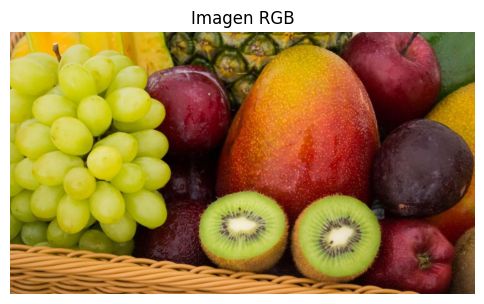

In [20]:
# Cargar la imagen con OpenCV (en formato BGR)
filename = "Frutas.jpg"
img_user = cv2.imread(filename)
mostrar_imagen(img_user, "Imagen RGB")

**2. Convertir la imagen a un espacio de color HSV.**

In [21]:
# Cargar la imagen
img = cv2.imread("Frutas.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convertir a HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

**3. Visualizar las bandas R, G, B, H, S, y V.**

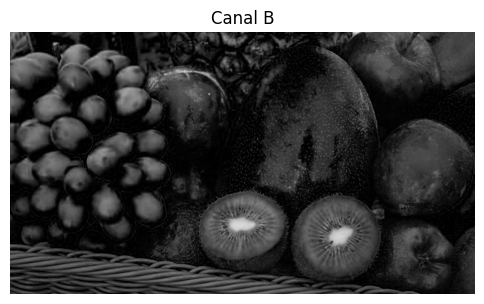

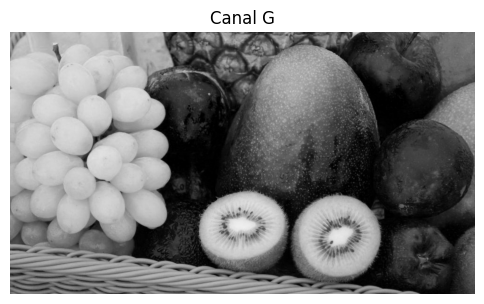

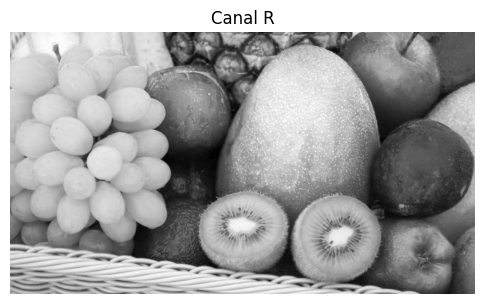

In [22]:
img = img_user.copy()

# Dividir canales
B, G, R = cv2.split(img)

# Mostrar cada canal (recordar que cada canal es en escala de grises)
mostrar_imagen(cv2.merge([B, B, B]), "Canal B")
mostrar_imagen(cv2.merge([G, G, G]), "Canal G")
mostrar_imagen(cv2.merge([R, R, R]), "Canal R")

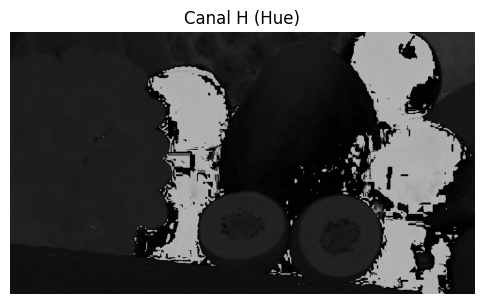

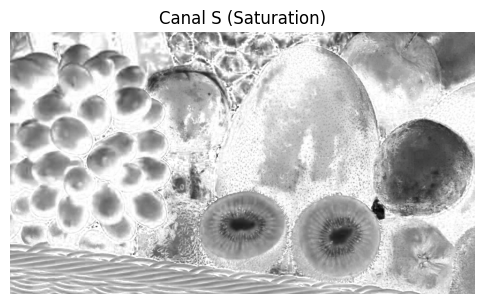

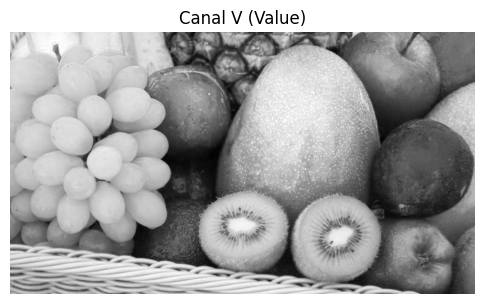

In [23]:
# Separar canales H, S y V
H, S, V = cv2.split(hsv)

# Mostrar cada canal por separado (en escala de grises, convertido a 3 canales BGR)
mostrar_imagen(cv2.merge([H, H, H]), "Canal H (Hue)")
mostrar_imagen(cv2.merge([S, S, S]), "Canal S (Saturation)")
mostrar_imagen(cv2.merge([V, V, V]), "Canal V (Value)")

**4. Experimentar con diferentes umbrales en las bandas para poder segmentar de la mejor forma una de las frutas mencionadas. Recuerde que puede combinar las máscaras binarias para mejorarlas utilizando operaciones lógicas**

In [24]:
# Rango de color rojo para las Manzanas
lower_red1 = np.array([0, 100, 80])
upper_red1 = np.array([10, 255, 255])

lower_red2 = np.array([160, 100, 80])
upper_red2 = np.array([180, 255, 255])

# Máscaras binarias
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = mask1 | mask2   # combinación de las dos

# Expandir máscara a 3 canales
mask_3c = cv2.merge([mask_red, mask_red, mask_red])

# Utilizando operadores lógicos
result_and = img_rgb & mask_3c   # AND
result_or  = img_rgb | mask_3c   # OR

**5. Visualizar tanto la imagen original en formato RGB como la máscara final de segmentación de la fruta (a la derecha la imagen RGB y a la izquierda la
máscara fina) Opcional: Si desea puede combinarlas a través de una multiplicación de la máscara con cada una de las bandas de color para
únicamente mostrar en color los objetos segmentados.**

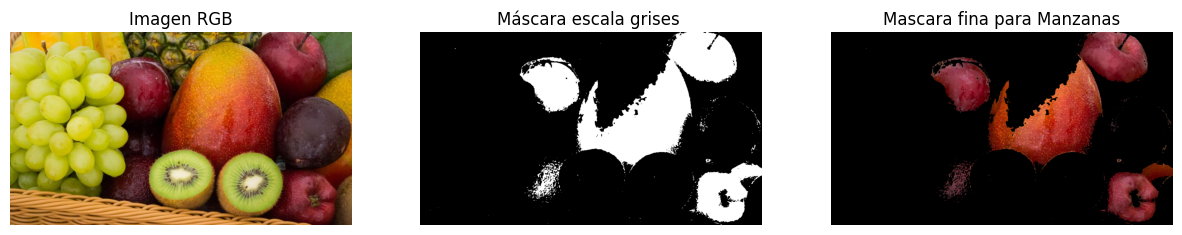

In [25]:
# Visualización para Manzanas
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(img_rgb)
axs[0].set_title("Imagen RGB")
axs[0].axis("off")

axs[1].imshow(mask_red, cmap="gray")
axs[1].set_title("Máscara escala grises ")
axs[1].axis("off")

axs[2].imshow(result_and)
axs[2].set_title("Mascara fina para Manzanas")
axs[2].axis("off")

plt.show()

**6. Explicar el criterio empleado para segmentar la fruta y responder la pregunta de reflexión**

El criterio se basa en separar los píxeles de la imagen que corresponden a ese color, usando un espacio de color adecuado; en este caso para las Manzanas, En lugar de trabajar en RGB, se convierte la imagen a HSV (Hue, Saturation, Value) El rojo es especial porque en el círculo de tono (Hue) está en los extremos: Alrededor de 0° a 10°(Rojos anaranjados) y de 160° a 180° (Rojos más oscuros). Por eso se usan dos rangos de umbral para luego combinarlos.

**Pregunta de reflexión: ¿Qué ventajas observas al trabajar en HSV frente a RGB para segmentar
colores?**

HSV es mejor que RGB porque aísla el color verdadero (Hue) de la iluminación (Value) y la intensidad (Saturation), lo que lo hace más robusto, intuitivo y confiable para segmentación por color.

## **Ejercicio 2: Detección de bordes en radiografía**

A partir de la siguiente imagen de una radiografía, aplicar técnicas de
preprocesamiento y detección de bordes para resaltar las estructuras óseas.


In [26]:
#Configuración inicial
# Celdas de código
# Función para mostrar imágenes en formato RGB (usando matplotlib)
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

**1. Cargar la imagen, convertirla a escala de grises y visualizarla.**

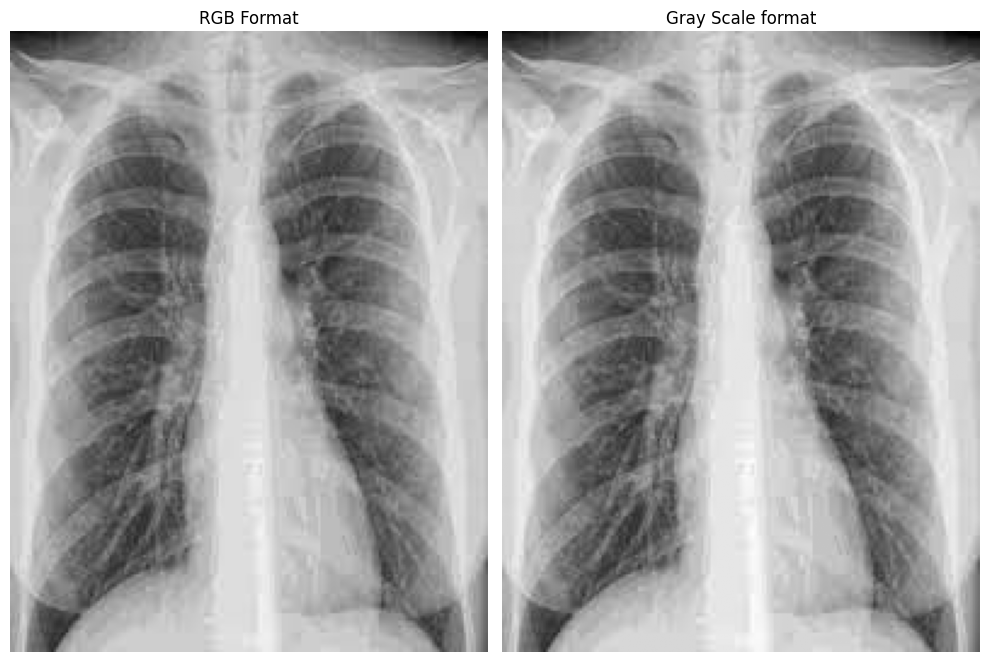

In [27]:
img_bgr = cv2.imread('/content/Radiografia.jpg')  # Reemplaza con la ruta correcta
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Visualización
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

axs[0].imshow(img_bgr, cmap='brg')
axs[0].set_title("RGB Format")
axs[0].axis('off')

axs[1].imshow(img_gray, cmap='gray')
axs[1].set_title("Gray Scale format")
axs[1].axis('off')

plt.tight_layout()
plt.show()

**2. Aplicar los filtros para reducción de ruido que considere más adecuados
(media, mediana o gaussiano).**

In [32]:
# Filtro de Media
img_media = cv2.blur(img_gray, (3, 3))

# Filtro de Mediana
img_mediana = cv2.medianBlur(img_gray, 3)

# Filtro Gaussiano
img_gauss = cv2.GaussianBlur(img_gray, (5, 5), 0)

**3. Visualizar la imagen mejorada con los filtros de reducción de ruido.**

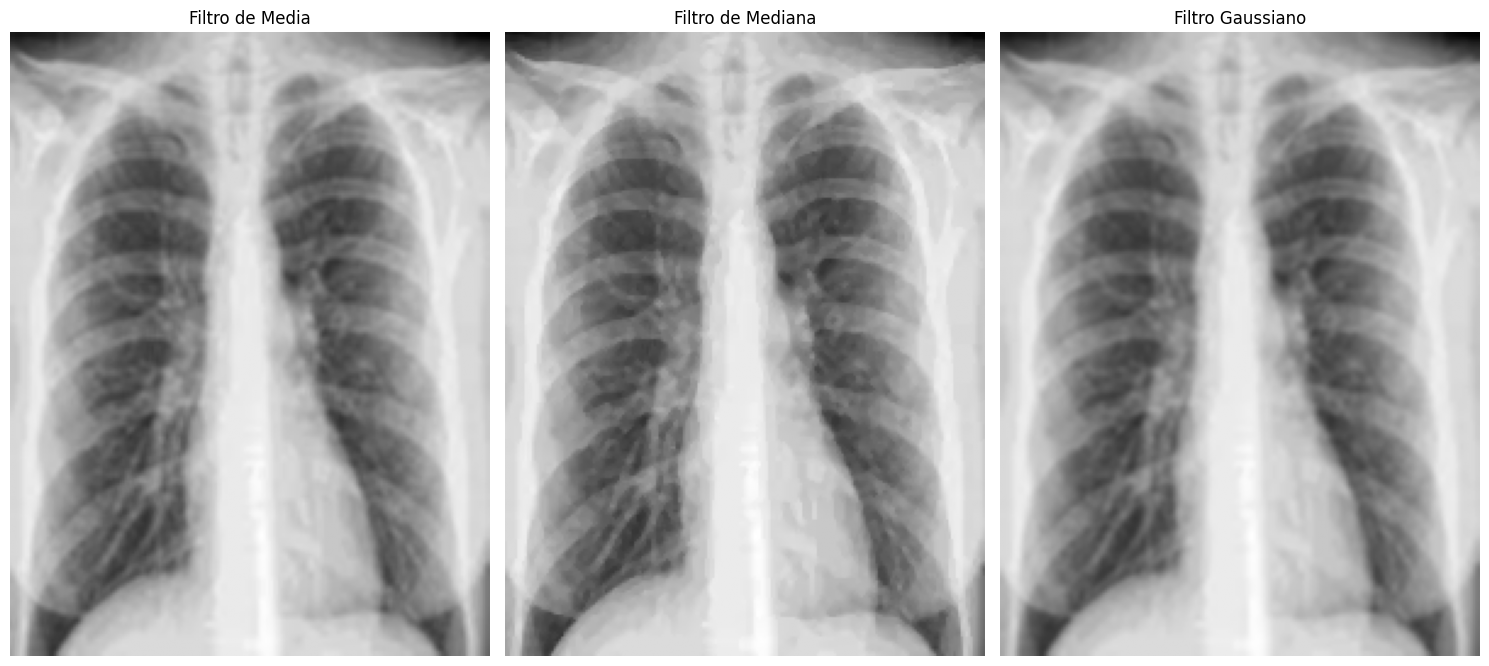

In [33]:
# Visualización de la imagen mejorada con los filtros de reducción de ruido.
fig, axs = plt.subplots(1, 3, figsize=(15, 15))

axs[0].imshow(img_media, cmap='gray')
axs[0].set_title("Filtro de Media")
axs[0].axis('off')

axs[1].imshow(img_mediana, cmap='gray')
axs[1].set_title("Filtro de Mediana")
axs[1].axis('off')

axs[2].imshow(img_gauss, cmap='gray')
axs[2].set_title("Filtro Gaussiano")
axs[2].axis('off')

plt.tight_layout()
plt.show()

**4. Aplicar los operadores Sobel y Canny para la detección de bordes.**

In [34]:
"""
Aplica el operador Sobel para calcular el gradiente en las direcciones x e y,
y devuelve la magnitud del gradiente.
"""
def obtener_bordes_sobel(imagen):
    sobelx = cv2.Sobel(imagen, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(imagen, cv2.CV_64F, 0, 1, ksize=3)
    magnitud = cv2.magnitude(sobelx, sobely)

    # Normalizar y convertir a uint8
    min_magnitud = np.min(magnitud)
    max_magnitud = np.max(magnitud)
    normalized_magnitud = (magnitud - min_magnitud) / (max_magnitud - min_magnitud)
    return normalized_magnitud

"""
Aplica el detector de bordes Canny con thresholds predeterminados.
"""
def obtener_bordes_canny(imagen):
    bordes = cv2.Canny(imagen, 50, 150)
    return bordes

# Aplicar métodos de detección de bordes sobre cada imagen filtrada
# Para Filtro de Media
bordes_media_sobel = obtener_bordes_sobel(img_media)
bordes_media_canny = obtener_bordes_canny(img_media)

# Para Filtro de Mediana
bordes_mediana_sobel = obtener_bordes_sobel(img_mediana)
bordes_mediana_canny = obtener_bordes_canny(img_mediana)

# Para Filtro Gaussiano
bordes_gaussiano_sobel = obtener_bordes_sobel(img_gauss)
bordes_gaussiano_canny = obtener_bordes_canny(img_gauss)

**5. Visualizar, comparar los resultados de ambas técnicas y seleccionar la que
considere mejor.**

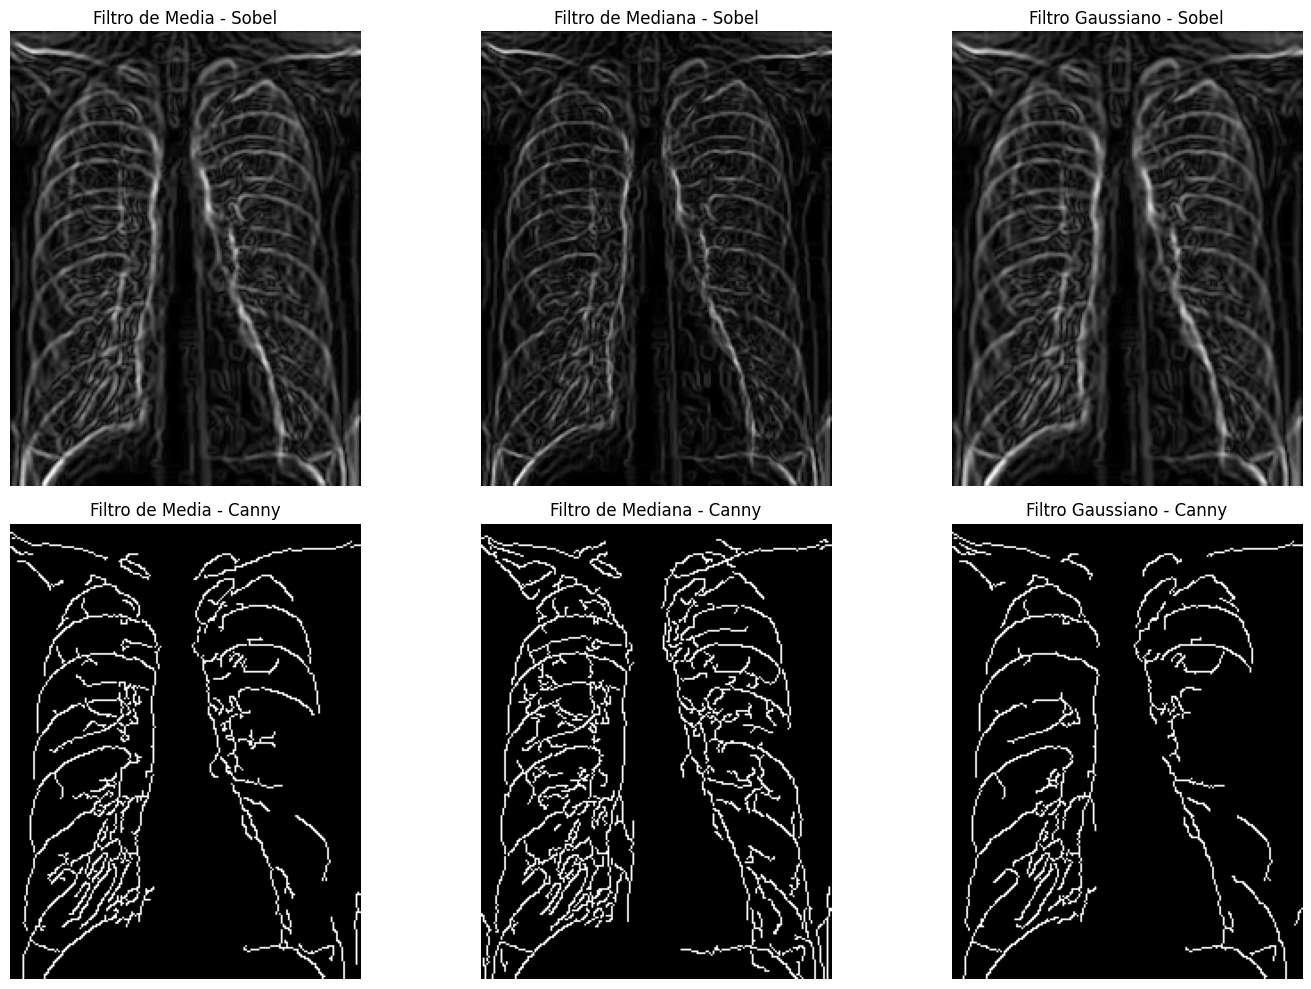

In [35]:
# Visualización de los resultados de ambas técnicas en 6 subplots (2 filas x 3 columnas)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Fila 1: Resultados con el operador Sobel
axs[0, 0].imshow(bordes_media_sobel, cmap='gray')
axs[0, 0].set_title("Filtro de Media - Sobel")
axs[0, 0].axis('off')

axs[0, 1].imshow(bordes_mediana_sobel, cmap='gray')
axs[0, 1].set_title("Filtro de Mediana - Sobel")
axs[0, 1].axis('off')

axs[0, 2].imshow(bordes_gaussiano_sobel, cmap='gray')
axs[0, 2].set_title("Filtro Gaussiano - Sobel")
axs[0, 2].axis('off')

# Fila 2: Resultados con el detector Canny
axs[1, 0].imshow(bordes_media_canny, cmap='gray')
axs[1, 0].set_title("Filtro de Media - Canny")
axs[1, 0].axis('off')

axs[1, 1].imshow(bordes_mediana_canny, cmap='gray')
axs[1, 1].set_title("Filtro de Mediana - Canny")
axs[1, 1].axis('off')

axs[1, 2].imshow(bordes_gaussiano_canny, cmap='gray')
axs[1, 2].set_title("Filtro Gaussiano - Canny")
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

**6. Explicar el criterio empleado para seleccionar el/los filtro(s) y el operador de bordes.**

Se elige el filtro según el tipo de ruido presente en la imagen. Luego se selecciona el operador de borde en función del nivel de ruido residual y del tipo de bordes que interesa detectar.

**Pregunta de reflexión: ¿Cuál operador te dió un mejor resultado? ¿Por qué?**

Para este caso como el objetivo principal de una radiografía de tórax es obtener una imagen de los órganos y estructuras internas del pecho (pulmones, corazón, grandes vasos sanguíneos, costillas y diafragma) para ayudar al médico a diagnosticar, controlar o descartar enfermedades. Por consiguiente, en este caso se utlizaría el filtro de reducción ruido de **Media** y la técnica de deteccion de bordes de **Sobel** ya que detecta bordes en direcciones horizontal y vertical, resalta bien contornos principales, pero genera ruido en bordes finos. **Estos serían los operadores más adecuados para analizar y evaluar partes blandas presentes en la región toráxica.**

## **Ejercicio 3: Segmentación de señales de tránsito por color y bordes**

Segmentar la señal de ciclovía a partir de la siguiente imagen, utilizando
segmentación por color y detección de bordes.


In [36]:
#Configuración inicial
# Celdas de código
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para mostrar imágenes en formato RGB (usando matplotlib)
def mostrar_imagen(img_bgr, titulo="Ciclovia"):
    """
    Recibe una imagen en formato BGR (tal como la maneja OpenCV)
    y la muestra convertida a RGB, sin ejes.
    """
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.title(titulo)
    plt.axis('off')
    plt.show()

**1. Cargar la imagen y visualizarla en el formato RGB correcto.**

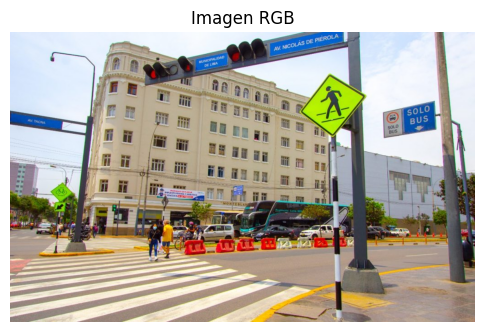

In [37]:
# Cargar la imagen con OpenCV (en formato BGR)
filename = "Ciclovia.jpg"
img_user = cv2.imread(filename)
mostrar_imagen(img_user, "Imagen RGB")

**2. Convertir la imagen a un espacio de color HSV.**

In [38]:
# Cargar la imagen
img = cv2.imread("Ciclovia.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convertir a HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

**3. Visualizar las bandas R, G, B, H, S, y V.**

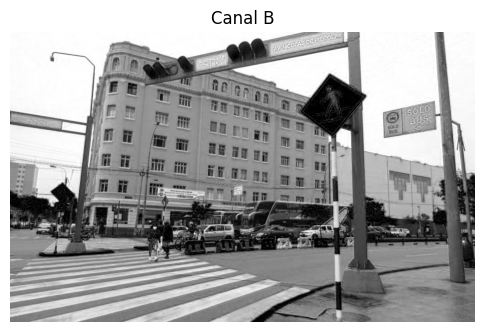

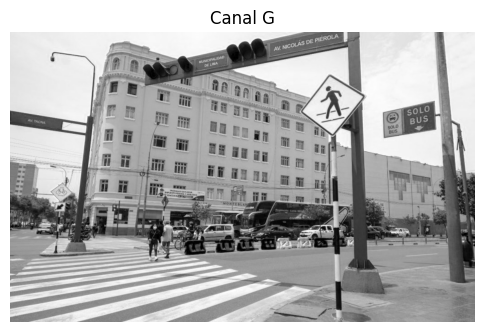

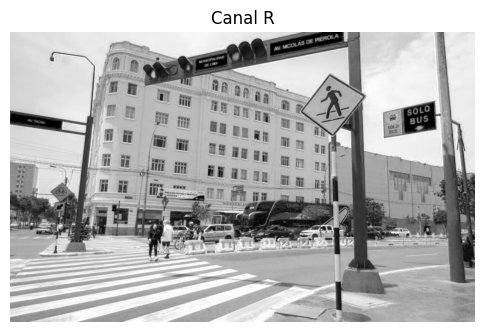

In [39]:
img = img_user.copy()

# Dividir canales
B, G, R = cv2.split(img)

# Mostrar cada canal (recordar que cada canal es en escala de grises)
mostrar_imagen(cv2.merge([B, B, B]), "Canal B")
mostrar_imagen(cv2.merge([G, G, G]), "Canal G")
mostrar_imagen(cv2.merge([R, R, R]), "Canal R")

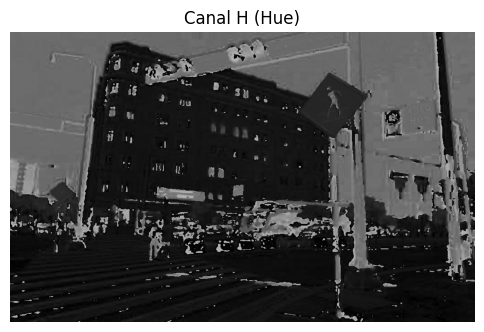

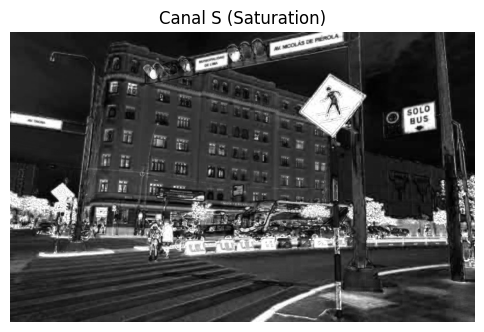

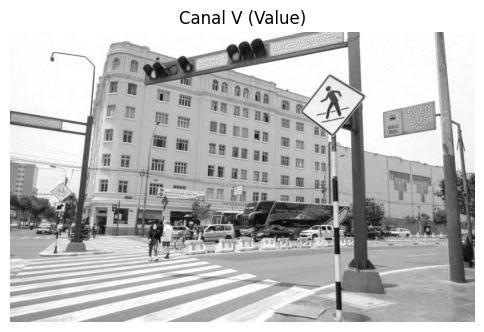

In [40]:
# Separar canales H, S y V
H, S, V = cv2.split(hsv)

# Mostrar cada canal por separado (en escala de grises, convertido a 3 canales BGR)
mostrar_imagen(cv2.merge([H, H, H]), "Canal H (Hue)")
mostrar_imagen(cv2.merge([S, S, S]), "Canal S (Saturation)")
mostrar_imagen(cv2.merge([V, V, V]), "Canal V (Value)")

**4. Experimentar con diferentes umbrales en las bandas para poder segmentar de la mejor forma la señal de ciclovía. Recuerde que puede combinar las máscaras binarias como crea conveniente (*).**

In [82]:
#  Rango de color amarillo para la señal
lower_yellow1 = np.array([40, 100, 80])
upper_yellow1 = np.array([80, 255, 255])

lower_yellow2 = np.array([130, 100, 80])
upper_yellow2 = np.array([170, 255, 255])

# Máscaras binarias
mask1 = cv2.inRange(hsv, lower_yellow1, upper_yellow1)
mask2 = cv2.inRange(hsv, lower_yellow2, upper_yellow2)
mask_yellow = mask1 | mask2   # combinación de las dos

# Expandir máscara a 3 canales
mask_3c = cv2.merge([mask_yellow, mask_yellow, mask_yellow])

# Utilizando operadores lógicos
result_and = img_rgb & mask_3c   # AND
result_or  = img_rgb | mask_3c   # OR

**5. Visualizar tanto la imagen original en formato RGB como la máscara de segmentación por color de la señal de tránsito (a la derecha la imagen RGB y a la izquierda la máscara de segmentación de este paso) Opcional: Si desea puede combinarlas a través de una multiplicación de la máscara con cada una de las bandas de color para únicamente mostrar en color los objetos segmentados.**

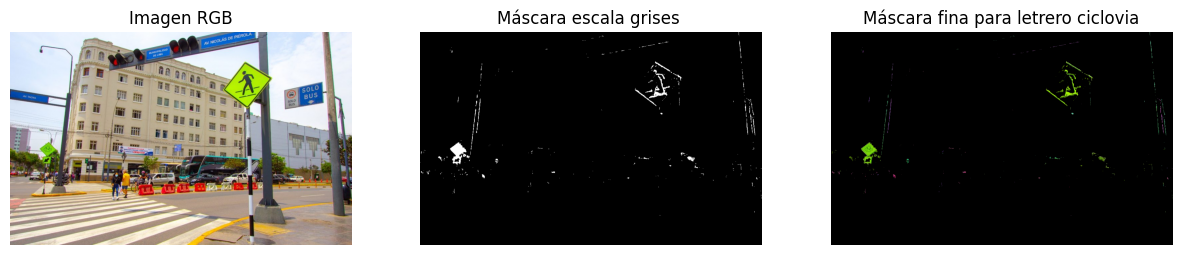

In [85]:
# Visualización para letrero ciclovia
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(img_rgb)
axs[0].set_title("Imagen RGB")
axs[0].axis("off")

axs[1].imshow(mask_red, cmap="gray")
axs[1].set_title("Máscara escala grises ")
axs[1].axis("off")

axs[2].imshow(result_and)
axs[2].set_title("Máscara fina para letrero ciclovia")
axs[2].axis("off")

plt.show()

**6. Explicar el criterio empleado para segmentar la señal de tránsito por color.**

El criterio se basa en separar los píxeles de la imagen que corresponden a ese color, usando un espacio de color adecuado; en este caso para las Manzanas, En lugar de trabajar en RGB, se convierte la imagen a HSV (Hue, Saturation, Value) El rojo es especial porque en el círculo de tono (Hue) está en los extremos: Alrededor de 40° a 80°(Amrillos) y de 130° a 170° (Azules). Por eso se usan dos rangos de umbral para luego combinarlos.

**7. Aplicar el operador de Canny para la detección de bordes sobre la máscara de segmentación por color y experimentar con los parámetros del operador.**

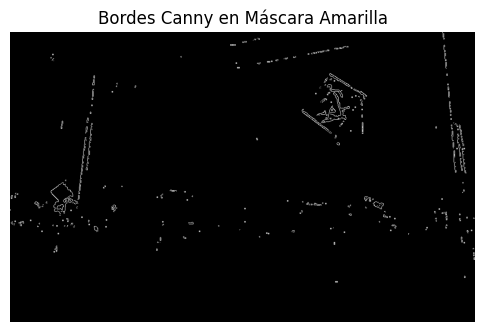

Experimentando con diferentes umbrales para Canny:


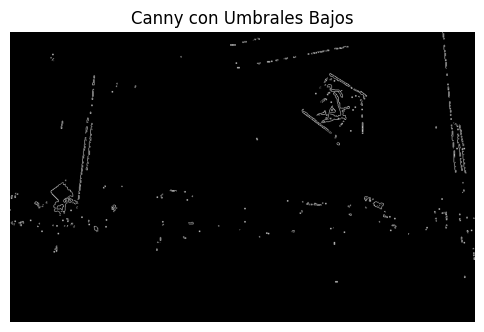

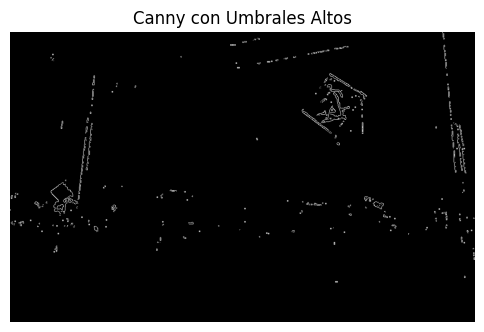

In [86]:
# Aplicar Canny sobre la máscara amarilla
edges_canny = cv2.Canny(mask_yellow, 100, 200) # Experimentar con estos umbrales

# Visualizar los bordes detectados por Canny
mostrar_imagen(cv2.merge([edges_canny, edges_canny, edges_canny]), "Bordes Canny en Máscara Amarilla")

# Experimentación con diferentes umbrales
edges_canny_low = cv2.Canny(mask_yellow, 50, 150)
edges_canny_high = cv2.Canny(mask_yellow, 150, 250)

print("Experimentando con diferentes umbrales para Canny:")
mostrar_imagen(cv2.merge([edges_canny_low, edges_canny_low, edges_canny_low]), "Canny con Umbrales Bajos")
mostrar_imagen(cv2.merge([edges_canny_high, edges_canny_high, edges_canny_high]), "Canny con Umbrales Altos")

**8. Visualizar la imagen original en formato RGB, la máscara de segmentación por color y la máscara de bordes (derecha, centro e izquierda respectivamente Opcional: Si desea puede combinarlas a través de una multiplicación de la máscara con cada una de las bandas de color para únicamente mostrar en color los objetos segmentados.**

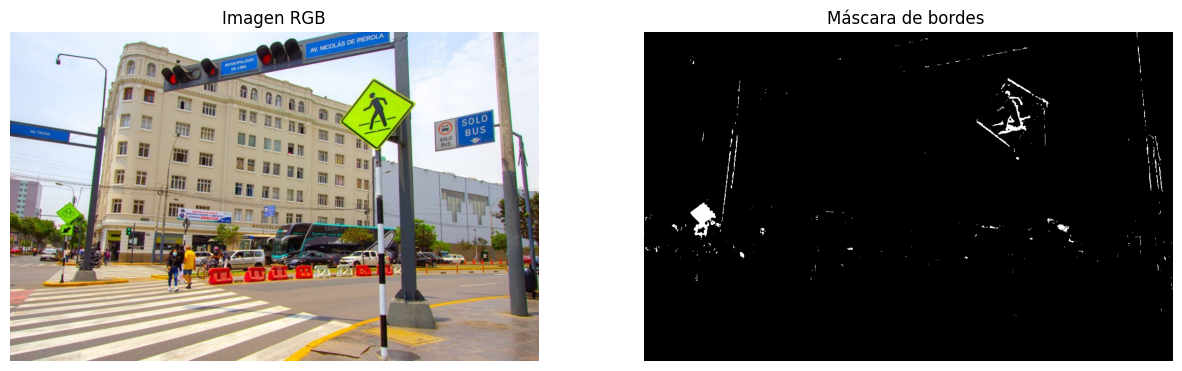

In [89]:
# Visualización para letrero ciclovia
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].imshow(img_rgb)
axs[0].set_title("Imagen RGB")
axs[0].axis("off")

axs[1].imshow(mask_red, cmap="gray")
axs[1].set_title("Máscara de bordes ")
axs[1].axis("off")

plt.show()

**Pregunta de reflexión: ¿Qué efecto tiene modificar el umbral del operador Canny?**

Ajustar los umbrales de Canny permite controlar la sensibilidad del detector a los bordes débiles y fuertes. Umbrales más bajos detectarán más bord (incluyendo ruido), mientras que umbrales más altos detectarán menos borde (solo los más prominentes).